# RecA imaging at different ciprofloxacin concentrations

In [1]:
from pyberries.data import DatasetPool, get_histogram
import seaborn.objects as so

data = (DatasetPool(path='./../../BACMMAN_datasets/',
                    dsList=['230725_1', '230725_2', '230809_1',
                            '230817_1', '230810_1', '230816_1',
                            '230906_1', '230906_2', '230912_1',
                            '230907_1', '230907_2', '230913_1',
                            '230118_DT23', '230720_1', '230720_2'],
                    groups=['0 ng/ml', '0 ng/ml', '0 ng/ml',
                            '3 ng/ml', '3 ng/ml', '3 ng/ml',
                            '10 ng/ml', '10 ng/ml', '10 ng/ml',
                            '20 ng/ml', '20 ng/ml', '20 ng/ml',
                            '30 ng/ml', '30 ng/ml', '30 ng/ml'],
                    metadata='DateTime',
                    filters={'all':'Frame < 50'}
                    )
        .assign(Time_min=lambda df: df.Time_min + 15)
        .bin_column(col='Time_min', binsize=15, binlabels='left')
        .assign(object_name='Bacteria_large', ClassIdx=lambda df: df.ClassIdx.replace({1: 'Diffuse', 2: 'Filament', 3: 'Focus'}))
        )

Dataset 230725_1 (group 0 ng/ml): loaded objects ['Bacteria_large', 'RecB_spots', 'RecA', 'RecB_raw']
Dataset 230725_2 (group 0 ng/ml): loaded objects ['Bacteria_large', 'RecB_spots', 'RecA', 'RecB_raw']
Dataset 230809_1 (group 0 ng/ml): loaded objects ['Bacteria_large', 'RecB_spots', 'RecA', 'RecB_raw']
Dataset 230817_1 (group 3 ng/ml): loaded objects ['Bacteria_large', 'RecB_spots', 'RecA', 'RecB_raw']
Dataset 230810_1 (group 3 ng/ml): loaded objects ['Bacteria_large', 'RecB_spots', 'RecA', 'RecB_raw']
Dataset 230816_1 (group 3 ng/ml): loaded objects ['Bacteria_large', 'RecB_spots', 'RecA', 'RecB_raw']
Dataset 230906_1 (group 10 ng/ml): loaded objects ['Bacteria_large', 'RecB_spots', 'RecA', 'RecB_raw']
Dataset 230906_2 (group 10 ng/ml): loaded objects ['Bacteria_large', 'RecB_spots', 'RecA', 'RecB_raw']
Dataset 230912_1 (group 10 ng/ml): loaded objects ['Bacteria_large', 'RecB_spots', 'RecA', 'RecB_raw']
Dataset 230907_1 (group 20 ng/ml): loaded objects ['Bacteria_large', 'RecB_spot

## General statistics

Number of cells

In [2]:
display(data
        .Bacteria_large
        .query('Frame == 0')
        .agg({'Indices':'count'})
        )

Indices    32031
dtype: int64

## Evolution of RecA structure proportions over time

##### Supp. Figure 12

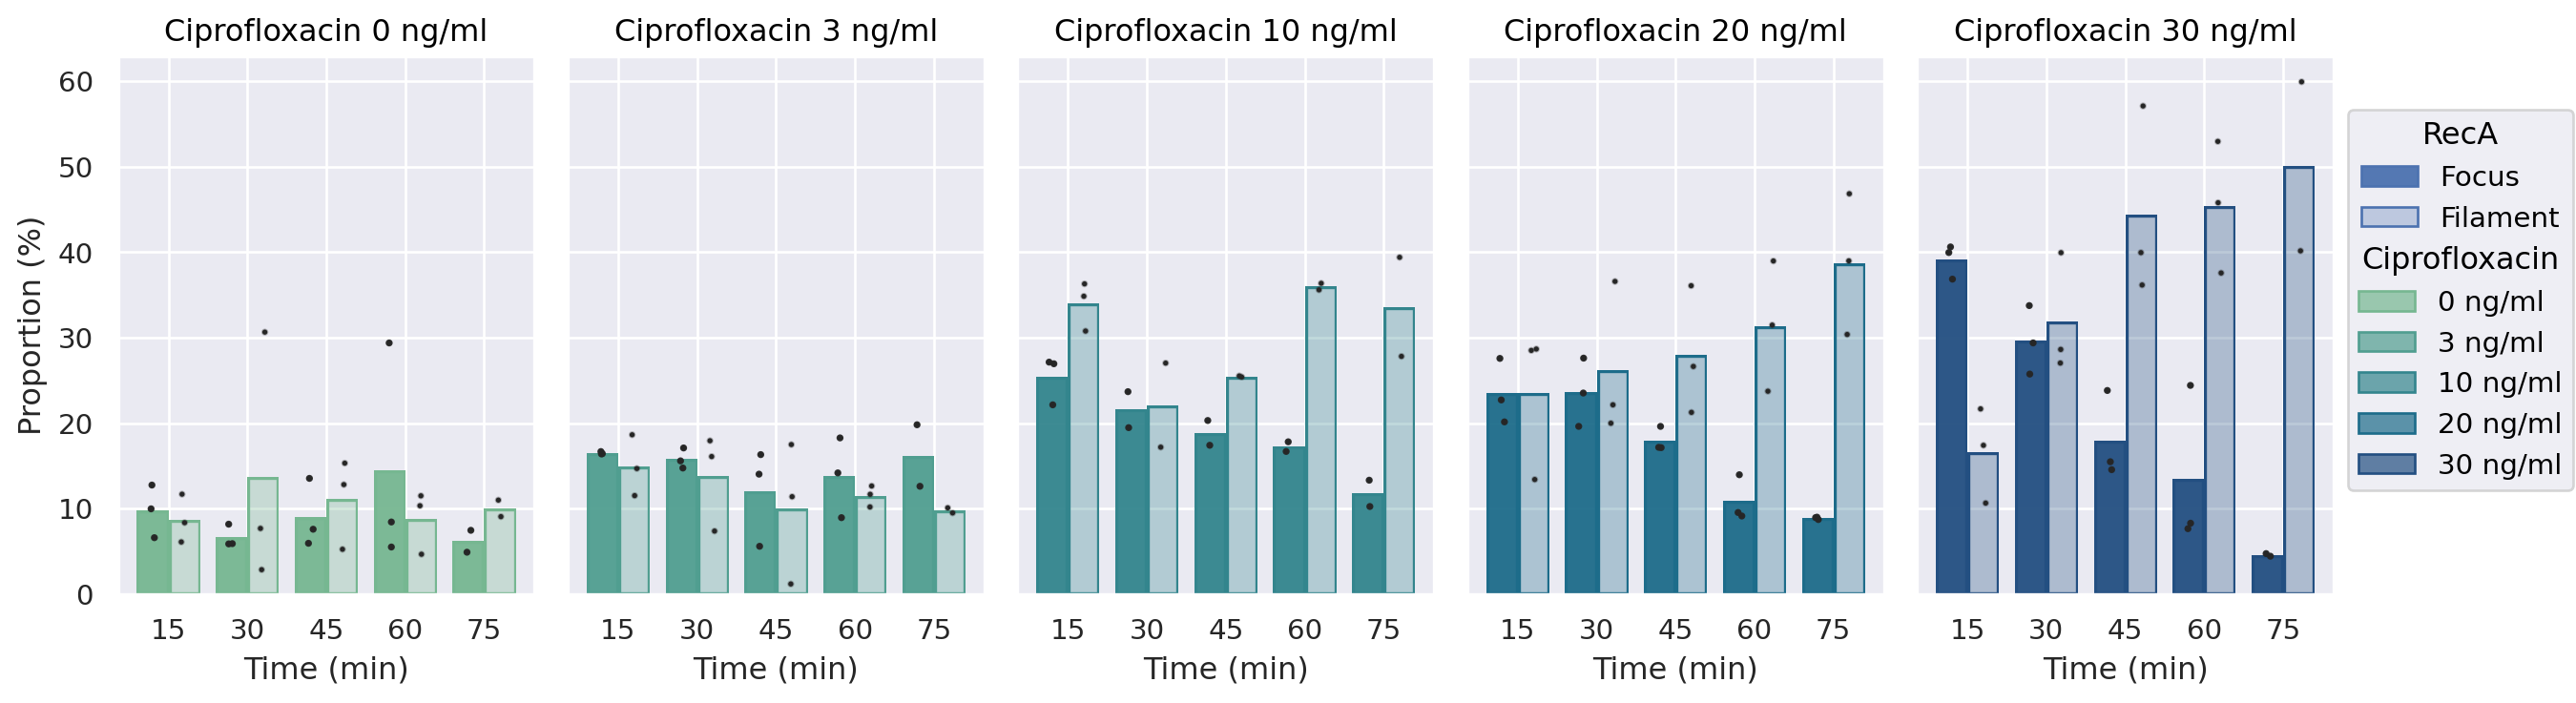

In [3]:
hist = (get_histogram(data.Bacteria_large, col='ClassIdx', discrete=True, density=True, groupby=['Group', 'Dataset', 'Time_min_bin'])
        .query('Time_min_bin <= 75 and ClassIdx != "Diffuse"')
        .assign(proportion=lambda df: df.proportion*100)
        )

(so.Plot(hist, x='Time_min_bin', y='proportion', alpha='ClassIdx', color='Group')
 .layout(size=(13, 4))
 .facet(col='Group')
 .add(so.Bar(), so.Agg(), so.Dodge(by=['alpha']))
 .add(so.Dots(color='k', marker='.', fillalpha=1), so.Jitter(.1), so.Dodge(by=['alpha']), legend=False)
 .scale(color='crest', x=so.Continuous().tick(every=15))
 .limit(x=(None, None), y=(0, None))
 .label(x="Time (min)", y="Proportion (%)", title='Ciprofloxacin {}'.format, color='Ciprofloxacin', alpha='RecA')
#  .save(loc='/media/daniel/HDD Daniel/DanielThedie/Python/RecB_article/SI_Figures/RecA_structures_B.svg', format='svg', bbox_inches='tight')
 )